## Hoja de trabajo #1

Documento en el que se trabajará los incisos 1.5-2.4 de la Hoja de Trabajo #1.
Se hizo uso de la función read_csv para leer el archivo csv.
En caso se desee replicar, se recomienda tener el archivo en el mismo directorio en el cual se está trabajando, para evitar realizarle modificaciones al momento de replicarlo.

In [103]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
baseballData = pd.read_csv('baseball_reference_2016_scrape.csv')
X = baseballData.iloc[:, :-1]
y = baseballData.iloc[:, -1]

### 1.5 Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos
Se grafican las variables cualitativas de:
- venue
- home team
- away team
- game type

<BarContainer object of 34 artists>

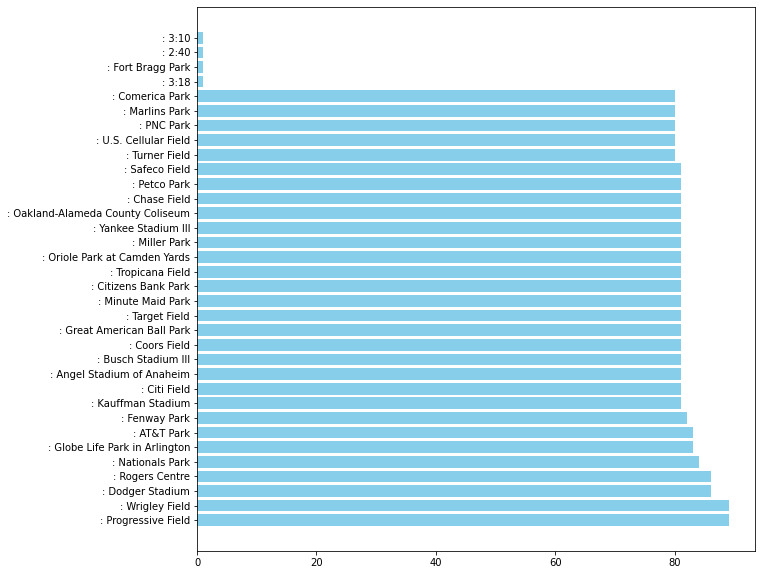

In [107]:
venueCount = baseballData['venue'].value_counts()
venues = list(venueCount.keys())
counts = list(venueCount.values)
fig = plt.figure(figsize = (10, 10))
 
# creating the bar plot
plt.barh(venues, counts, color ='skyblue')

<BarContainer object of 30 artists>

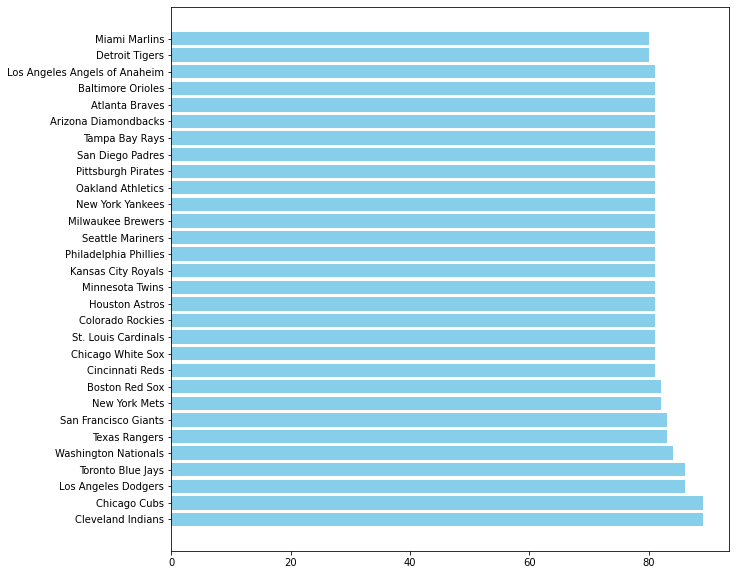

In [108]:
hometeamCount = baseballData['home_team'].value_counts()
teams = list(hometeamCount.keys())
counts = list(hometeamCount.values)
fig = plt.figure(figsize = (10, 10))
 
# creating the bar plot
plt.barh(teams, counts, color ='skyblue')

<BarContainer object of 30 artists>

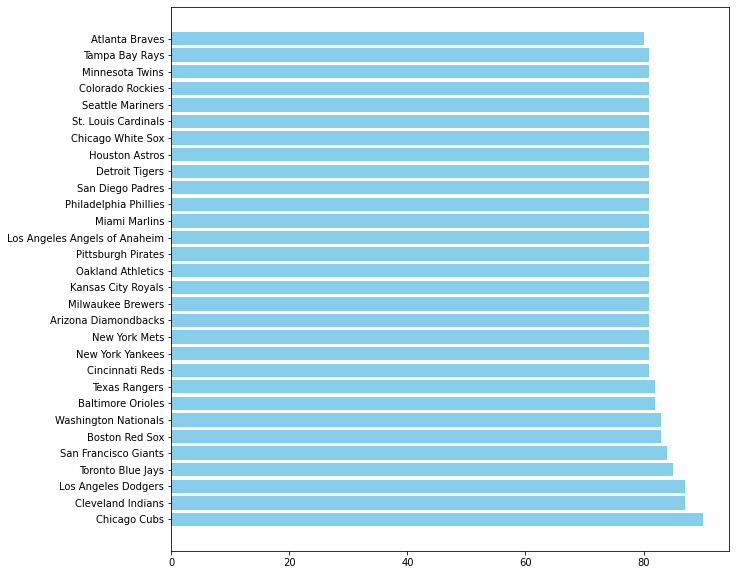

In [109]:
awayteamCount = baseballData['away_team'].value_counts()
teams = list(awayteamCount.keys())
counts = list(awayteamCount.values)
fig = plt.figure(figsize = (10, 10))
 
# creating the bar plot
plt.barh(teams, counts, color ='skyblue')

Text(0.5, 0, 'counts')

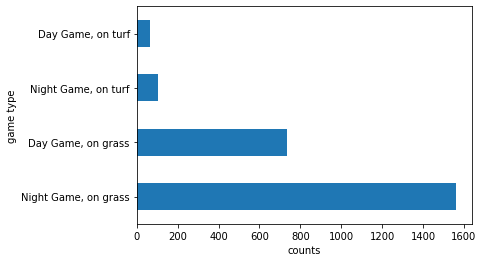

In [110]:
gametypeCount = baseballData['game_type'].value_counts()
gametypeCount.plot(kind='barh')
plt.ylabel('game type')
plt.xlabel('counts')

In [111]:
print(baseballData['field_type'].unique())

[nan]


### 1.6 Realice la limpieza de variables utilizando las técnicas vistas en clase, u otras que piense pueden ser de utilidad
Se considera que la columna de boxscore_url y other_info_string son columnas que no se precisan en este data set por lo tanto se eliminaran estas. Asi mismo se le data un peso a aquellas variables cualitativas y tambien se cambiara los valores Null a 0 en todas las columnas correspondientes. Finalmente se normalizaran los datos para tener todos en un solo formato numerico ya que algunos son strings con numeros y texto adicional que no es util. Se borrara la columna de field type pues todos estan vacios.

In [112]:
baseballData = baseballData.drop([
  'boxscore_url',
  'other_info_string',
  'field_type'
],axis=1)
baseballData

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,start_time,venue
0,"40,030']",New York Mets,1,7,3,"Sunday, April 3, 2016",: 3:13,"Night Game, on grass",Kansas City Royals,0,9,4,Start Time: 7:38 p.m. Local,: Kauffman Stadium
1,"21,621']",Philadelphia Phillies,0,5,2,"Wednesday, April 6, 2016",: 2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,Start Time: 7:11 p.m. Local,: Great American Ball Park
2,"12,622']",Minnesota Twins,0,5,2,"Wednesday, April 6, 2016",: 3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,Start Time: 7:07 p.m. Local,: Oriole Park at Camden Yards
3,"18,531']",Washington Nationals,0,8,3,"Wednesday, April 6, 2016",: 2:53,"Night Game, on grass",Atlanta Braves,1,8,1,Start Time: 7:10 p.m. Local,: Turner Field
4,"18,572']",Colorado Rockies,1,8,4,"Wednesday, April 6, 2016",: 2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,Start Time: 12:40 p.m. Local,: Chase Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,"31,042']",Toronto Blue Jays,2,7,5,"Sunday, April 3, 2016",: 2:51,"Day Game, on turf",Tampa Bay Rays,1,7,3,Start Time: 4:09 p.m. Local,: Tropicana Field
2459,"39,500']",St. Louis Cardinals,0,5,1,"Sunday, April 3, 2016",: 3:02,"Day Game, on grass",Pittsburgh Pirates,1,9,4,Start Time: 1:15 p.m. Local,: PNC Park
2460,"20,098']",San Francisco Giants,0,6,3,"Wednesday, April 6, 2016",: 3:19,"Day Game, on grass",Milwaukee Brewers,2,9,4,Start Time: 12:41 p.m. Local,: Miller Park
2461,"17,883']",Detroit Tigers,0,13,7,"Wednesday, April 6, 2016",: 3:22,"Day Game, on grass",Miami Marlins,1,10,3,Start Time: 4:57 p.m. Local,: Marlins Park


In [113]:
baseballData['attendance'] = baseballData['attendance'].str.replace("']", "")
baseballData['attendance'] = baseballData['attendance'].str.replace(",", "")


C:\Users\cordo\AppData\Local\Temp\ipykernel_21268\135181816.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  baseballData['attendance'] = baseballData['attendance'].str.replace("']", "")


In [114]:
# se borran aquellas lineas que no tengan corelacion con los datos (3 lineas de 2463 = 0.12% de la data no es relevante.)
indexes = []
for n in baseballData['attendance']:
  try:
    int(n)
  except:
    baseballData = baseballData[baseballData["attendance"] != n]


In [115]:
baseballData['attendance'] = baseballData['attendance'].astype(int)
baseballData[['attendance']]

,attendance
0,40030
1,21621
2,12622
3,18531
4,18572
...,...
2458,31042
2459,39500
2460,20098
2461,17883


In [116]:
teams = baseballData['home_team'].unique()
teams = teams.tolist()

for i in teams:
    lineaIndiceH = baseballData[baseballData['home_team'] == i].index
    lineaIndiceA = baseballData[baseballData['away_team'] == i].index
    indexTEMP = teams.index(i)
    for index in lineaIndiceH:
        baseballData.loc[index, 'home_team'] = indexTEMP
        
    for index in lineaIndiceA:
        baseballData.loc[index, 'away_team'] = indexTEMP
baseballData[['home_team', 'away_team']]

,home_team,away_team
0,0,15
1,1,14
2,2,16
3,3,21
4,4,20
...,...,...
2458,6,22
2459,8,23
2460,11,24
2461,12,18


In [117]:
# limpiar game duration
for time in baseballData['game_duration']:
  if type(time) == int: continue
  indiceTime = baseballData[baseballData['game_duration'] == time].index
  x = int(time.split(":")[1]) * 60 + int(time.split(":")[2])
  for index in indiceTime:
    baseballData.loc[indiceTime,'game_duration'] = x
baseballData[['game_duration']]


,game_duration
0,193
1,143
2,191
3,173
4,159
...,...
2458,171
2459,182
2460,199
2461,202


In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
baseballData['venue'] = encoder.fit_transform(baseballData['venue'])
baseballData['game_type'] = encoder.fit_transform(baseballData['game_type'])
baseballData[['game_type', 'venue']]

,game_type,venue
0,2,13
1,2,12
2,2,19
3,2,27
4,0,3
...,...,...
2458,1,26
2459,0,20
2460,0,15
2461,0,14


2.1. Siga los procedimientos vistos en clase para poder realizar una regresión lineal con los datos dados

In [121]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 1/3, random_state = 0)
baseballData

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,start_time,venue
0,40030,15,1,7,3,"Sunday, April 3, 2016",193,2,0,0,9,4,Start Time: 7:38 p.m. Local,13
1,21621,14,0,5,2,"Wednesday, April 6, 2016",143,2,1,0,8,3,Start Time: 7:11 p.m. Local,12
2,12622,16,0,5,2,"Wednesday, April 6, 2016",191,2,2,0,9,4,Start Time: 7:07 p.m. Local,19
3,18531,21,0,8,3,"Wednesday, April 6, 2016",173,2,3,1,8,1,Start Time: 7:10 p.m. Local,27
4,18572,20,1,8,4,"Wednesday, April 6, 2016",159,0,4,0,8,3,Start Time: 12:40 p.m. Local,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,31042,22,2,7,5,"Sunday, April 3, 2016",171,1,6,1,7,3,Start Time: 4:09 p.m. Local,26
2459,39500,23,0,5,1,"Sunday, April 3, 2016",182,0,8,1,9,4,Start Time: 1:15 p.m. Local,20
2460,20098,24,0,6,3,"Wednesday, April 6, 2016",199,0,11,2,9,4,Start Time: 12:41 p.m. Local,15
2461,17883,18,0,13,7,"Wednesday, April 6, 2016",202,0,12,1,10,3,Start Time: 4:57 p.m. Local,14


In [122]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_entreno, y_entreno)

ValueError: could not convert string to float: "49,289']"

In [ ]:
y_pred = regresor.predict(X_prueba)

In [ ]:
plt.scatter(X_entreno, y_entreno, color = 'red')
plt.plot(X_entreno, regresor.predict(X_entreno), color = 'blue')
plt.title('Salario vs Experiencia (Conjunto de entrenamiento)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

In [ ]:
plt.scatter(X_prueba, y_prueba, color = 'red')
plt.plot(X_entreno, regresor.predict(X_entreno), color = 'blue')
plt.title('Salario vs Experiencia (Conjunto de prueba)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

2.2. ¿Cuál es el rendimiento de su modelo? Calcule el parámetro R2 para dar
respaldo a su respuesta

In [ ]:
print(regresor.coef_)
print(regresor.intercept_)

2.3. Obtenga las constantes del modelo y exprese la ecuación que representan

2.4. Esta interesado en predecir cuál será la asistencia a un partido en el que se enfrenten X y Y equipos (Ud decide cuáles), así como el día de la semana, la hora y el estado (también los decide Ud) y otras variables que exija su modelo. Para estos valores, ¿cuál es la predicción de la asistencia?